Doing basic analysis

In [34]:
from model import read_into_dataframe, extract_data
import matplotlib.pyplot as plt
import pandas as pd

df = read_into_dataframe("./data/bs140513_032310.csv")
df.info()
print(df.head())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     

Drawing some bar graphs allows us to get an idea what variables might indicate fraud

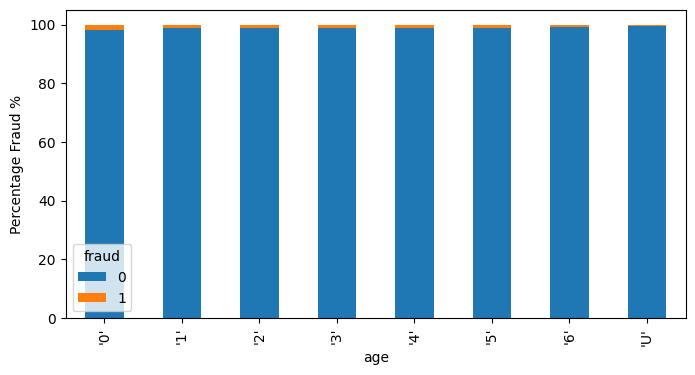

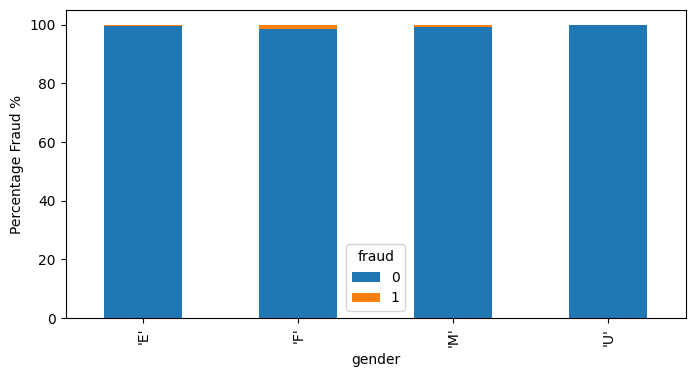

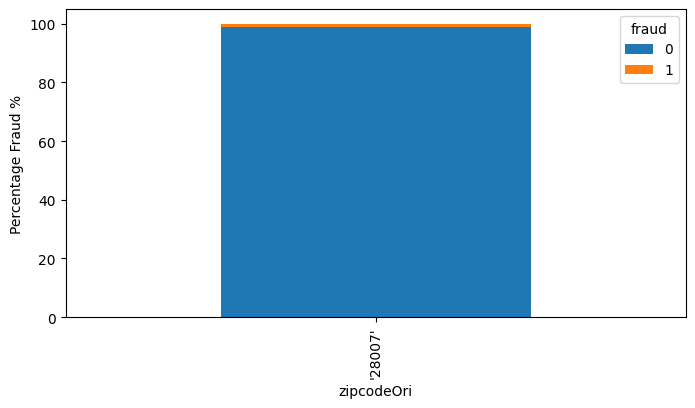

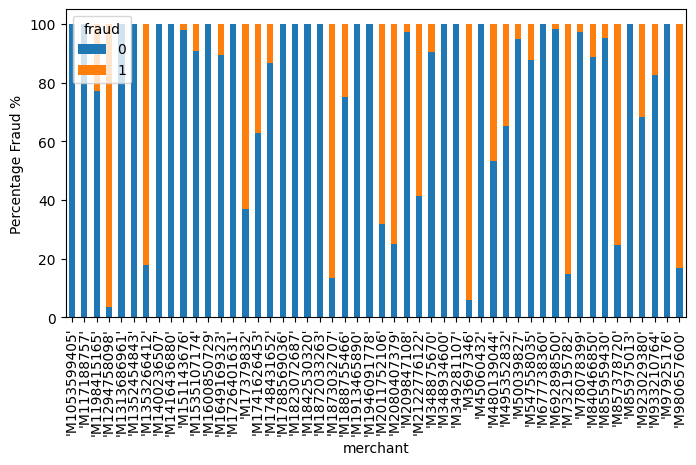

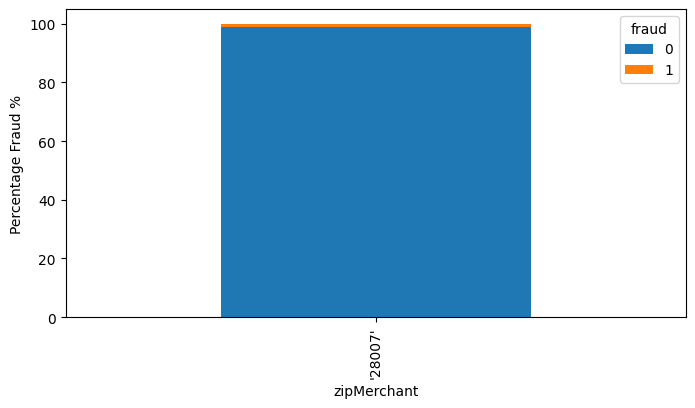

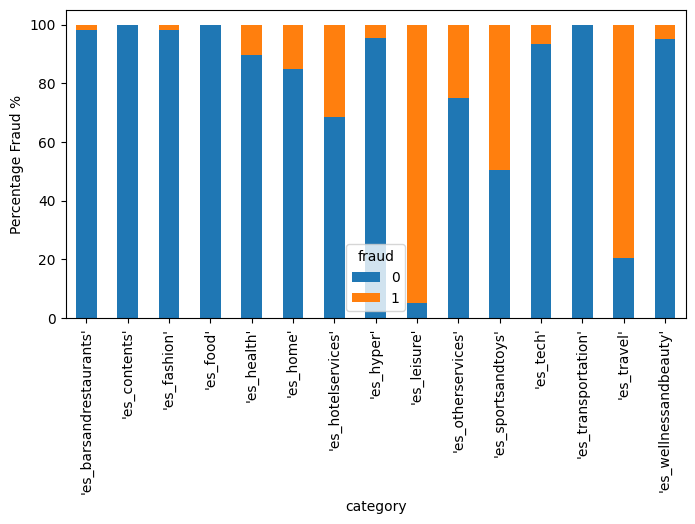

In [35]:
for col in df:
    if col != "fraud" and col != "amount" and col != "customer" and col != "step":
        (pd.crosstab(df[col], df["fraud"],normalize="index")*100).plot(kind="bar",figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Fraud %')

Age should have almost 0 unique fields so we are looking at that.
We can see that there is one U which I am assuming is a  mistake and since it is only one row we will just remove it

In [36]:
print(df["age"].unique())
print(df["step"].min())
df["step"].max()

["'4'" "'2'" "'3'" "'5'" "'1'" "'6'" "'U'" "'0'"]
0


179

Interestingly there are a two other genders 'E' and 'U' but in much lower proportion then 'F' an 'M'.

In [37]:
df["gender"].value_counts()

gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64

Looking at how even the data set is in terms of fraud and not fraud.
It is obvious that fraud and non fraud is imbalanced if scikitlearn does not automatically scramble data I should

In [38]:
df["fraud"].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

In [39]:
# just moved to different block so that it isn't rerun
x_df, y_df = extract_data(df, "onehot")
df = x_df.join(y_df)

In [40]:
corr = df.corr()
sorted_corr = corr["fraud"].drop("fraud").sort_values(ascending=False, key=lambda x: x.abs())
for variable, corr_value in sorted_corr.items():
    print(f"Variable: {variable}, Correlation: {corr_value}")
df.describe().T

Variable: amount, Correlation: 0.48990305764019726
Variable: 'M980657600', Correlation: 0.4098630340723754
Variable: 'es_sportsandtoys', Correlation: 0.3639931120455374
Variable: 'M480139044', Correlation: 0.3198405860614404
Variable: 'es_transportation', Correlation: -0.26315157081013235
Variable: 'es_travel', Correlation: 0.2504036600459691
Variable: 'es_leisure', Correlation: 0.2483384895044909
Variable: 'M732195782', Correlation: 0.24579371401140807
Variable: 'M3697346', Correlation: 0.19355371123199935
Variable: 'M1873032707', Correlation: 0.15982057678782582
Variable: 'M1294758098', Correlation: 0.15553815604639362
Variable: 'es_hotelservices', Correlation: 0.1502557537721174
Variable: 'es_health', Correlation: 0.14223940093750373
Variable: 'M2122776122', Correlation: 0.12541317380326422
Variable: 'M2011752106', Correlation: 0.1241115545335874
Variable: 'M17379832', Correlation: 0.12358688937248623
Variable: 'M1823072687', Correlation: -0.11165944302769766
Variable: 'M1198415165'

,count,mean,std,min,25%,50%,75%,max
step,593465.0,94.978482,51.057162,0.0,52.00,97.0,139.00,179.00
age,593465.0,3.006240,1.325342,0.0,2.00,3.0,4.00,6.00
amount,593465.0,37.892641,111.486356,0.0,13.74,26.9,42.54,8329.96
fraud,593465.0,0.012120,0.109423,0.0,0.00,0.0,0.00,1.00


Histograms of the numerical data

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'fraud'}>]], dtype=object)

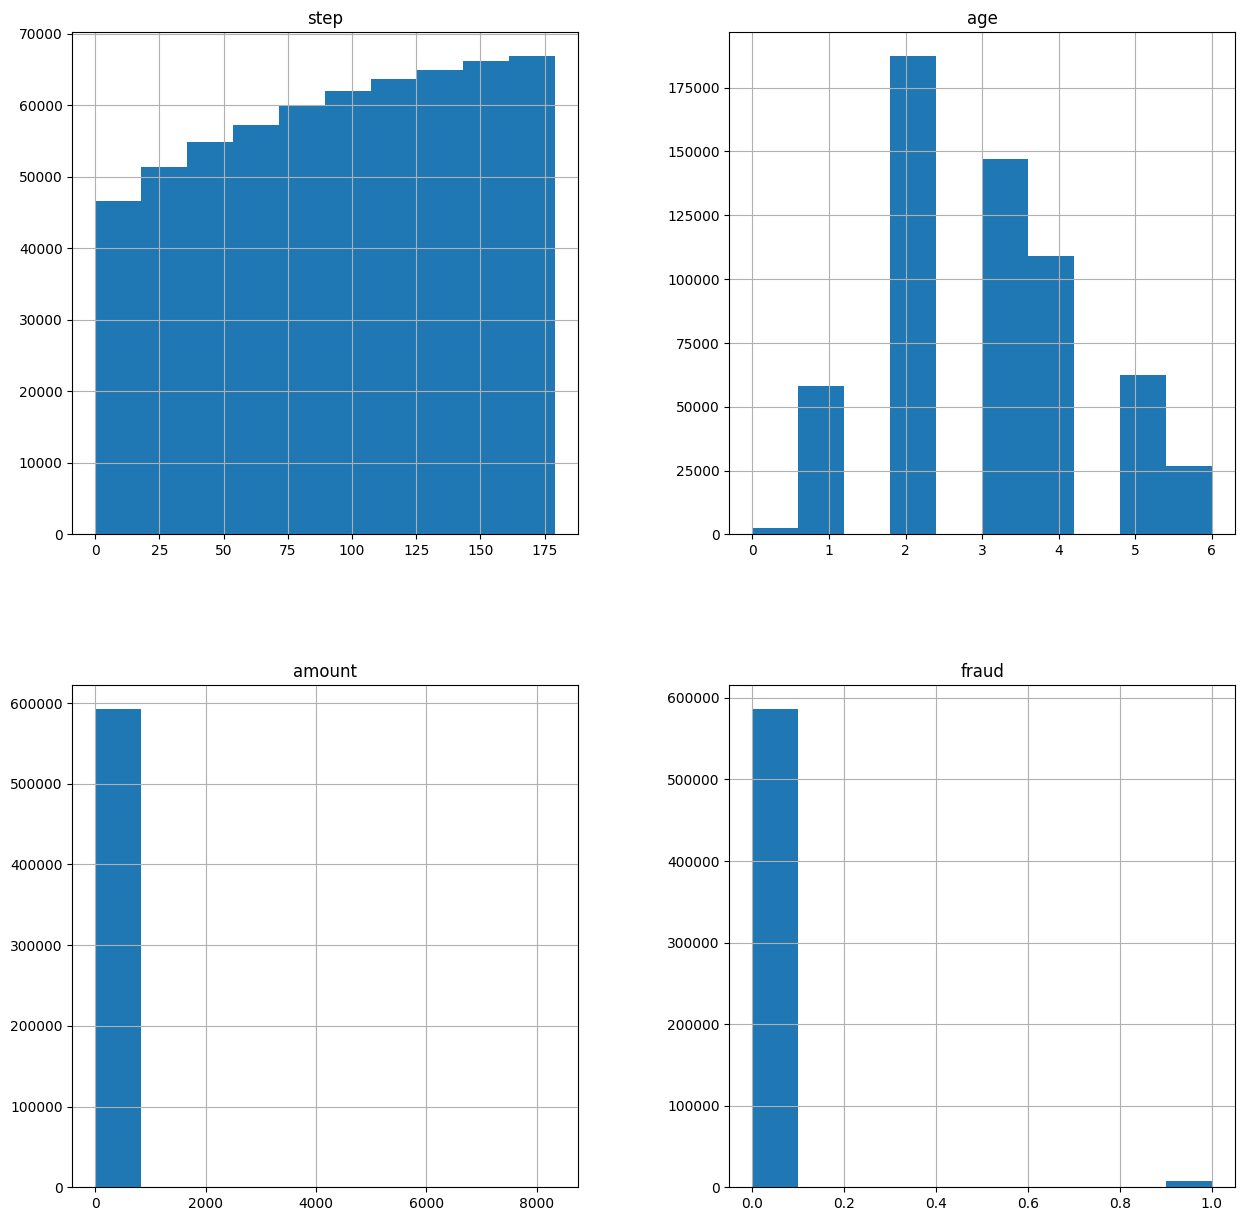

In [41]:
df.hist(figsize=(15,15))

Looking at the one hot encoded columns which I created

In [42]:
boolean_columns = df.select_dtypes(include=bool).columns
for column in boolean_columns:
    print(df[column].value_counts())

'F'
True     324565
False    268900
Name: count, dtype: int64
'M'
False    325080
True     268385
Name: count, dtype: int64
'U'
False    592950
True        515
Name: count, dtype: int64
'28007'
True    593465
Name: count, dtype: int64
'M1053599405'
False    586663
True       6802
Name: count, dtype: int64
'M117188757'
False    593444
True         21
Name: count, dtype: int64
'M1198415165'
False    591886
True       1579
Name: count, dtype: int64
'M1294758098'
False    593275
True        190
Name: count, dtype: int64
'M1313686961'
False    592941
True        524
Name: count, dtype: int64
'M1352454843'
False    593099
True        366
Name: count, dtype: int64
'M1353266412'
False    593387
True         78
Name: count, dtype: int64
'M1400236507'
False    592690
True        775
Name: count, dtype: int64
'M1416436880'
False    593245
True        220
Name: count, dtype: int64
'M151143676'
False    587106
True       6359
Name: count, dtype: int64
'M1535107174'
False    591599
True       1866
N